# XGBoost

In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [44]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### DATASET

In [45]:
df = pd.read_csv("C://Users//ertug//Desktop//Machine_Learning_Courses//_3_Classification//diabetes.csv//diabetes.csv")

In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
y = df["Outcome"]

In [48]:
X = df.drop(["Outcome"], axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.3,
                                                    random_state=42)

### Model & Training

In [50]:
import xgboost
from xgboost import XGBClassifier

In [51]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [52]:
y_pred = xgb_model.predict(X_test)

In [53]:
dir(xgb_model)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_features_count',
 '_get_param_names',
 '_get_tags',
 '_le',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'apply',
 'base_score',
 'booster',
 'classes_',
 'coef_',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'evals_result',
 'feature_importances_',
 'fit',
 'gamma',
 'get_booster',
 'get_num_boosting_rounds',
 'get_params',
 'get_xgb_params',
 'gpu_id',
 'importance_type',
 'interaction_constraints',
 'intercept_',
 'kwargs',
 'learning_rate',
 'load_model',
 'max

In [54]:
?xgb_model #  loss --> gerçek değerler ile tahmin edilen değerler arasındaki farkın nasıl optimize edileceğinini inceler.
           #  learning_rate --> öğrenme oranıdır. learning_rate ile n_estimators arasında bir ilişki mevcuttur.
           #  n_estimators --> kullanılacak olan ağaç sayısıdır. --> rassallığı sağlıyor.
           #  criterion --> bölünmeleri ayarlayabilmek için belirli kriterler kullanılır 
           #  min_samples_split --> bölünme için gerekli olan minimum örnek sayısını ifade ediyor.

Object `xgb_model #  loss --> gerçek değerler ile tahmin edilen değerler arasındaki farkın nasıl optimize edileceğinini inceler.` not found.


In [55]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.513876701232177

In [56]:
accuracy_score(y_test, y_pred)

0.7359307359307359

In [57]:
r2_score(y_test, y_pred)

-0.16647350993377508

In [58]:
confusion_matrix(y_test, y_pred)

array([[116,  35],
       [ 26,  54]], dtype=int64)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       151
           1       0.61      0.68      0.64        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [60]:
xgb_model.predict_proba(X_test)

array([[2.86711514e-01, 7.13288486e-01],
       [9.35198545e-01, 6.48014322e-02],
       [9.69252884e-01, 3.07471156e-02],
       [9.05433238e-01, 9.45667773e-02],
       [8.55554700e-01, 1.44445285e-01],
       [1.83682442e-01, 8.16317558e-01],
       [9.99794304e-01, 2.05702978e-04],
       [3.64508033e-02, 9.63549197e-01],
       [2.49039948e-01, 7.50960052e-01],
       [6.02806568e-01, 3.97193432e-01],
       [9.41632152e-01, 5.83678260e-02],
       [1.30645633e-02, 9.86935437e-01],
       [9.73568857e-01, 2.64311563e-02],
       [8.85742247e-01, 1.14257768e-01],
       [9.99483824e-01, 5.16197993e-04],
       [6.49103880e-01, 3.50896120e-01],
       [9.94587541e-01, 5.41247474e-03],
       [9.99858558e-01, 1.41437515e-04],
       [2.29358733e-01, 7.70641267e-01],
       [3.98710072e-01, 6.01289928e-01],
       [5.09828210e-01, 4.90171790e-01],
       [9.97552752e-01, 2.44723447e-03],
       [9.38261390e-01, 6.17386177e-02],
       [9.99914825e-01, 8.51854275e-05],
       [3.142967

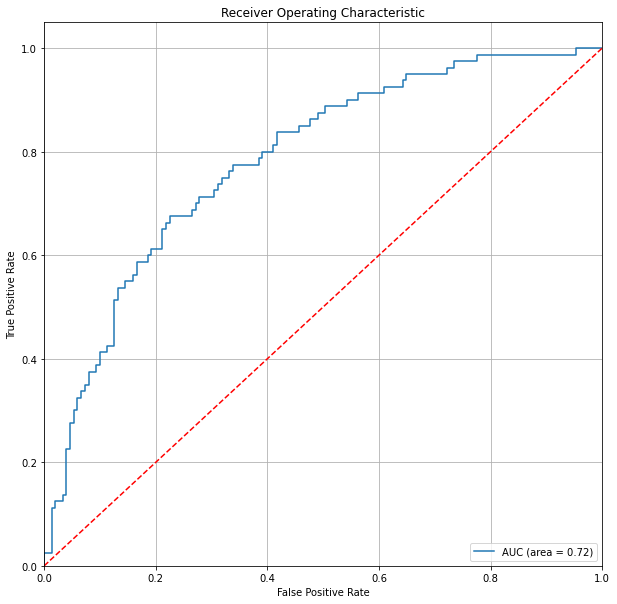

In [61]:
logit_roc_auc = roc_auc_score(y_test, xgb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("GBM_ROC")
plt.grid(1)
plt.show()

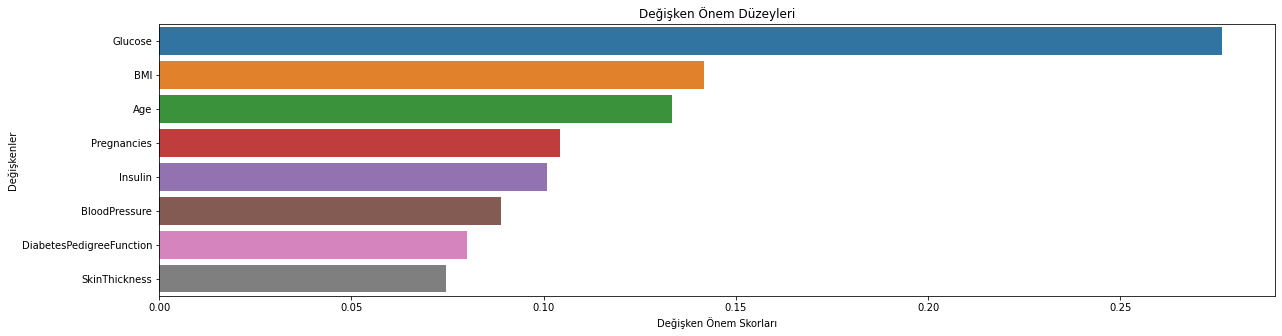

In [62]:
feature_imp = pd.Series(xgb_model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");

### MODEL TUNING

In [27]:
xgb_model = XGBClassifier()

In [28]:
xgb_params = {"n_estimators": [100, 200, 500, 1000, 2000],
              "subsample": [.6, .8, 1],
              "max_depth": [3, 5, 7],
              "learning_rate": [.1, .01, .001, .0001, .00001]}

In [29]:
xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 225 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1047 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1492 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 2057 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 13.5min finished


In [30]:
xgb_cv_model.best_params_

{'learning_rate': 1e-05,
 'max_depth': 7,
 'n_estimators': 1000,
 'subsample': 0.6}

In [31]:
xgb_cv_model.best_score_

0.7819357092941999

In [32]:
xgb_tuned = XGBClassifier(n_estimators=xgb_cv_model.best_params_.get("n_estimators"),
                          subsample=xgb_cv_model.best_params_.get("subsample"),
                          max_depth=xgb_cv_model.best_params_.get("max_depth"),
                          learning_rate=xgb_cv_model.best_params_.get("learning_rate"),).fit(X_train,
                                                                                             y_train)

In [33]:
y_pred = xgb_tuned.predict(X_test)

In [34]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.49236596391733095

In [35]:
accuracy_score(y_test, y_pred)

0.7575757575757576

In [36]:
r2_score(y_test, y_pred)

-0.07086092715231818

In [37]:
confusion_matrix(y_test, y_pred)

array([[121,  30],
       [ 26,  54]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.68      0.66        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



In [39]:
xgb_tuned.predict_proba(X_test)

array([[0.5001975 , 0.4998025 ],
       [0.5037015 , 0.4962985 ],
       [0.50414723, 0.49585277],
       [0.5032978 , 0.49670216],
       [0.50095165, 0.49904838],
       [0.49917674, 0.50082326],
       [0.5044681 , 0.49553192],
       [0.49838203, 0.50161797],
       [0.49909824, 0.50090176],
       [0.49893826, 0.50106174],
       [0.5012226 , 0.49877742],
       [0.4967422 , 0.5032578 ],
       [0.50080705, 0.49919295],
       [0.500512  , 0.499488  ],
       [0.5043285 , 0.4956715 ],
       [0.5020344 , 0.49796554],
       [0.5042135 , 0.4957865 ],
       [0.5043116 , 0.49568838],
       [0.49840063, 0.5015994 ],
       [0.499389  , 0.500611  ],
       [0.5004742 , 0.49952582],
       [0.5035738 , 0.4964262 ],
       [0.50089073, 0.4991093 ],
       [0.5044079 , 0.4955921 ],
       [0.49894536, 0.50105464],
       [0.4959188 , 0.5040812 ],
       [0.5041981 , 0.4958019 ],
       [0.5044312 , 0.4955688 ],
       [0.5025735 , 0.49742648],
       [0.5027032 , 0.49729684],
       [0.

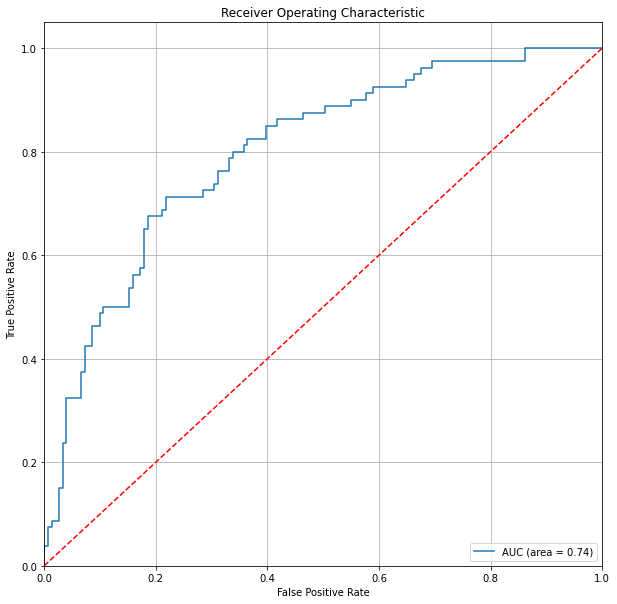

In [40]:
logit_roc_auc = roc_auc_score(y_test, xgb_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_tuned.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("GBM_ROC")
plt.grid(1)
plt.show()

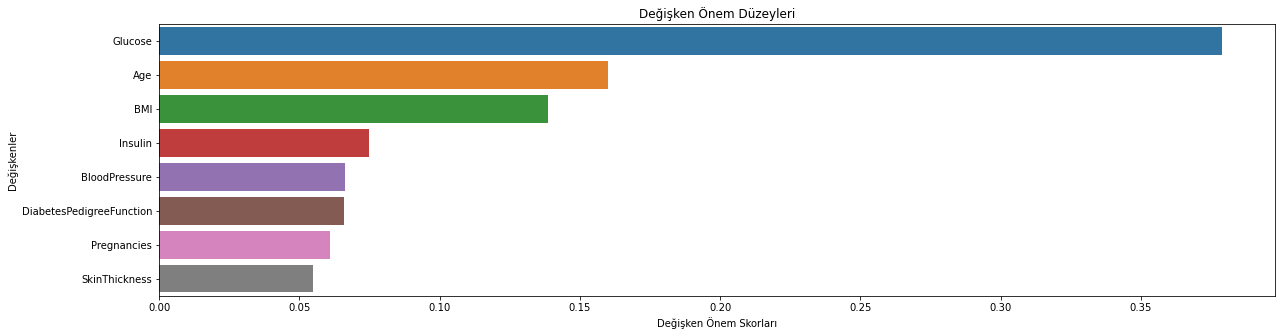

In [41]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");